In [1]:
import numpy as np
from math import sqrt
from sklearn import datasets, linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from evaluacion_funciones import * # pip install graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression

In [2]:
# Carga de datos.
dataset = datasets.load_boston()
X = dataset.data
y = dataset.target
print(np.shape(X))

(506, 13)


In [3]:
# Métricas de evaluación.
metricas = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2': metrics.r2_score}

In [4]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

(404, 13)


In [ ]:
# 2) Extracción de características
# 3) Selección de atributos

In [5]:
# 4) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
stdr_trained = standardizer.fit(X_training)
X_stdr = stdr_trained.transform(X_training)

In [6]:
# 5) Construcción del algoritmo de aprendizaje.
k = 10
reg = KNeighborsRegressor(n_neighbors = k, weights='distance', metric='euclidean')

cross_val_MAE:   3.0116 +/- 0.6315


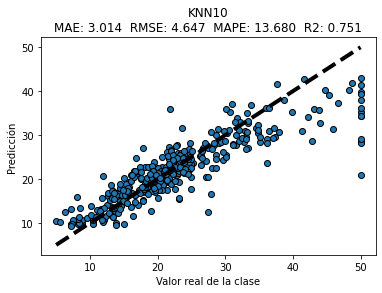

In [9]:
# 5.1) Validación cruzada interna
y_pred = cross_val_predict(reg, X_stdr, y_training, cv = KFold(n_splits=10, shuffle=True, random_state=42))

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_val_score(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=10, shuffle=True, random_state=42), scoring='neg_mean_absolute_error')
print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))

# Visualización de resultados
results = evaluacion(y_training, y_pred, metricas)
grafica_real_vs_pred(y_training, y_pred, results, "KNN"+str(k))

In [10]:
# 5.2) Entrenamiento del modelo definitivo
model = reg.fit(X_stdr, y_training)

In [ ]:
# ---- PREDICCIÓN ---- #

In [ ]:
# 6) Extracción de las características de test
# 7) Selección de los atributos de test 

In [11]:
# 8) Estandarización de las característiacs de test
X_test_stdr = stdr_trained.transform(X_testing)

In [12]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)

In [13]:
# 10) Evaluación del modelo sobre el conjunto de test
results = evaluacion(y_testing, y_pred_test, metricas)
print(results)

{'MAE': 2.6973830677859816, 'RMSE': 4.756644451647784, 'MAPE': 12.863163725156904, 'R2': 0.6914700774412903}


In [14]:
# Comparación con el algoritmo de regresión lineal en test
reg_OLS = linear_model.LinearRegression() # definición
model_OLS = reg_OLS.fit(X_stdr,y_training) # entrenamiento completo
y_pred_OLS = model_OLS.predict(X_test_stdr) # Predicción
results = evaluacion(y_testing, y_pred_OLS, metricas) # Evaluación de resultados
print(results)

{'MAE': 3.1890919658878483, 'RMSE': 4.928602182665338, 'MAPE': 16.866394539378717, 'R2': 0.6687594935356318}
